# CHI 2018 - Learning the Ropes
This file contains the analysis for the CHI2018 Learning the Ropes submission. The purpose of this analysis is to understand how individuals make use of practice task workflows.

**In this analysis, we seek to answer the following research questions:**
- ***RQ1: When are practice tasks used?***
    - **RQ1.a**: What percent of individuals never practice?
    - **RQ1.b**: Do individuals start with the practice workflow?
    - **RQ1.c**: How long do practice sessions last?
    - **RQ1.d**: When do individuals stop using practice tasks?
    - **RQ1.e**: Are there predictors (e.g. a challenging task) that indicate an individual may transition to practice?
    
- ***RQ2: What is the relationship between practicing and user performance?***
    - **RQ2.a**: Does practicing improve individuals' accuracy?
    - **RQ2.b**: Do individuals complete tasks faster when practicing?
    - **RQ2.c**: Are individuals more careless when practicing?
    - **RQ3.a**: Are individuals more consistent in their performance when practicing?

- ***RQ3: What is the relationship between practicing and user engagement?***
    - **RQ3.a**: Do individuals re-engage with the active workflow after practicing?
        - *RQ3.a.1*: If so, how many practice tasks do individuals completed for re-engaging?
    - **RQ3.b**: Are individuals who practice more likely to stay in engaged with the task than those that don't?
        - *RQ3.b.1*.: If so, is there a relationship with recurring usage of the practice task workflow? 
    - **RQ3.c**: Do individuals who practice see more subjects than those that don't?   

## Contents
1. Data Wrangling
    1. Arrangement
    2. Aggregation
    3. Compute Ground Truth
2. Analysis
    1. Practice Task Usage
    2. Practicing and Performance
    3. Praciticing and Engagement

## Data Preparation

In [58]:
import pandas

# read in the active workflow CSVs
df_active_1 = pandas.read_csv("data/map-the-milky-way-classifications.csv")
df_active_2 = pandas.read_csv("data/map-the-milky-way-2-classifications.csv", dtype='unicode')

# merge the active workflow files
df_active = pandas.concat([df_active_1, df_active_2])
df_active['practice'] = 0

# read the practice workflow CSVs
df_practice = pandas.read_csv("data/learning-the-ropes-classifications.csv", dtype='unicode')
df_practice['practice'] = 1 

# merge the active and practice frames
df = pandas.concat([df_active, df_practice]).sort_values('created_at')

### Add columns for label counts + expert identification.

In [64]:
### Define a function to handle the counting for each object.
# Here, we're assuming that, if an object has been counted, it was counted in the correct position.
import json
def getCount(label, x):
    # count the number w/ type == label
    # 0 -> Bubble
    # 1 -> Bow Shock
    # 2 -> Bow Shock Driving Star
    # 3 -> Yellowball
    # 4 -> Other Objects
    
    j = json.loads(x)
    j = [x for x in j if x['task'] == "T1"]
    return len([y for x in j for y in x['value'] if y['tool'] == label])

# Get counts for each object
df['bubble'] = df['annotations'].apply(lambda x: getCount(0, x))
df['bowshock'] = df['annotations'].apply(lambda x: getCount(1, x))
df['bowshockdriving'] = df['annotations'].apply(lambda x: getCount(2, x))
df['yellowball'] = df['annotations'].apply(lambda x: getCount(3, x))
df['other'] = df['annotations'].apply(lambda x: getCount(4, x))
df['total'] = df['bubble'] + df['bowshock'] + df['bowshockdriving'] + df['yellowball'] + df['other']

In [61]:
# Here, we simply put the session metadata into its own column.
def getSession(x):
    # Extract the session string into its own column
    return json.loads(x)['session']

df['session'] = df['metadata'].apply(lambda x: getSession(x))

In [62]:
def isExpert(username):
    # Define a list of expert users
    experts = ['dmdixon',
               'babinder13',
               'dmlepore',
               'gwolfchase',
               'tharinduj',
               'skendrew',
               'andersld',
               'jimdale',
               'koepferl',
               'kerton',
               'bobbenjamin',
               'Jeandrews',
               'povich']
    
    if username in experts:
        return 1
    return 0
    
df['is_expert'] = df['user_name'].apply(lambda x: isExpert(x))    

### Create the Ground Truth Reference Table for Each Subject

In [66]:
# Filter for experts, group the expert's responses by the subject ID, and take the mean.
gt_df = df[df.is_expert == 1].groupby(['subject_ids']).mean().round()
#gt_df.drop('practice', axis=1, inplace=True)  # Drop unnecessary columns. 
gt_df.drop('is_expert', axis=1, inplace=True) # Drop unnecessary columns. 

# Print the first few rows as verification.
gt_df

,practice,bubble,bowshock,bowshockdriving,yellowball,other,total
subject_ids,,,,,,,
2224491,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224516,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224525,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224540,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224567,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224579,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224665,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2224698,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2224731,0.0,3.0,0.0,0.0,0.0,0.0,3.0


## RQ1: When are practice tasks used?

Before we address anything, the first question we should be asking ourselves is: "To what extent do people use practice tasks?". The Milky Way Project's practice workflow has 21 unique images with expert annotations. Let's use this information to help us characterize how individuals might utilize the practice workflow in general. 

Let's start with a simple visualization:

Text(0.5,19.8,'Number of Completed Practice Tasks')

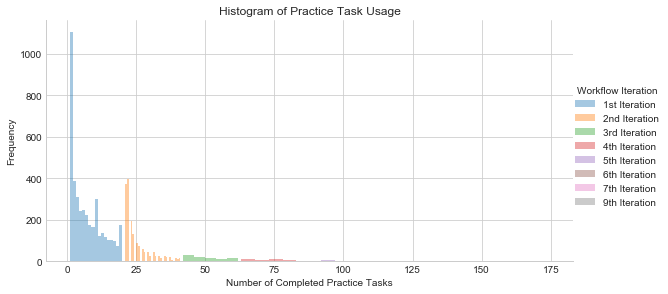

In [156]:
# Separate the Practice Tasks and get the number of completed tasks for each logged in user.
df_practice_test = df[(df.is_expert == 0) & (~df.user_name.str.contains('not-logged-in')) & (df.practice == 1)]
df_practice_amt = df_practice_test.user_name.value_counts()
df_practice_amt = pandas.DataFrame({'user_name':df_practice_amt.index, 'amt':df_practice_amt.values})

# Calculate the number of times the user has looped through the practice workflow
df_practice_amt['practice_loop_idx'] = np.floor(df_practice_amt['amt'] / 21)
#df_practice_amt = df_practice_amt[df_practice_amt.amt > 21]

# Draw a histogram of the data.
#sns.distplot(df_practice_nums_trimmed.amt, kde=False)

g = sns.FacetGrid(df_practice_amt, hue="practice_loop_idx", size=4, aspect=2)
g = g.map(sns.distplot, "amt", kde=False)

g.add_legend()
g._legend.set_title("Workflow Iteration")
new_labels = ['1st Iteration', '2nd Iteration', '3rd Iteration', '4th Iteration', '5th Iteration', '6th Iteration', '7th Iteration', '9th Iteration']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# specify axis limits / ticks
#g.set(xlim=(0,50))

# add axis + title information
plt.title("Histogram of Practice Task Usage")
plt.ylabel("Frequency") 
plt.xlabel("Number of Completed Practice Tasks")

### **RQ1.a**: What percent of individuals never practice?

In [6]:
##############################
# Consider Only Logged-in Users
##############################
df = df[(df.is_expert == 0) & (~df.user_name.str.contains('not-logged-in'))]

# Get a list of unique names for practice / active workflows
practice_data = df[df.practice == 1].user_name.unique()
active_data = df[df.practice == 0].user_name.unique()

# Convert NPArrays to DataFrames
practice_names = pandas.DataFrame(data=practice_data)
active_names = pandas.DataFrame(data=active_data)

# Concatenate the data frames and keep *only* the rows with usersnames that are duplicated
names = pandas.concat([practice_names, active_names])
names = pandas.DataFrame(data=names[names.duplicated(keep=False)][0].unique())
users_who_practiced = active_names.shape[0] - names.shape[0]
total_users = df[(df.is_expert == 0)].user_name.unique()

# Display
print("- - - - - - - - - - - - - - - - -")
print("Logged-In Users Only")
print("- - - - - - - - - - - - - - - - -")
print("Number of Users who Practiced:\t"+str(users_who_practiced))
print("Total Number of Users:\t\t"+str(total_users.shape[0]))
print("Practicing Percentile:\t\t"+'%.1f'%(float(users_who_practiced)/float(total_users.shape[0])*100)+"%")


- - - - - - - - - - - - - - - - -
Logged-In Users Only
- - - - - - - - - - - - - - - - -
Number of Users who Practiced:	4779
Total Number of Users:		10668
Practicing Percentile:		44.8%


In [330]:
# Convert practice_names DF into a list
practice_names.columns = ['user_name']
practice_names_list = practice_names['user_name'].tolist()

# Now, annotate each user row with did_practice
def didPractice(username):
    # Define a list of expert users
    if username in practice_names_list:
        return 1
    return 0
    
df['did_practice'] = df['user_name'].apply(lambda x: didPractice(x))   

### **RQ1.b**: Do individuals start with the practice workflow?

In [7]:
# get the first annotations made by each person
first_annotations = df[df['user_name'].isin(names[0])].groupby('user_name').first()

# separate the annotations that were done in practice / active workflows
in_practice = first_annotations[first_annotations.practice == 1]
in_active = first_annotations[first_annotations.practice == 0]

# display
print("\n- - - - - - - - - - - - - - - - -")
print("Logged-In Users Only")
print("- - - - - - - - - - - - - - - - -")
print("Num. Users Start w/ Prac:\t"+str(in_practice.shape[0]))
print("Total Num of Users:\t\t"+str(users_who_practiced))
print("Percentile:\t\t\t"+'%.1f'%(float(in_practice.shape[0])/float(users_who_practiced)*100)+"%")



- - - - - - - - - - - - - - - - -
Logged-In Users Only
- - - - - - - - - - - - - - - - -
Num. Users Start w/ Prac:	2489
Total Num of Users:		4779
Percentile:			52.1%


### Now, we focus on two questions simultaneously:
- **RQ1.c**: How long do practice sessions last? Do individuals return to the practice workflow? 
- **RQ1.d**: When do individuals stop using practice tasks?

In [8]:
import numpy as np

# Create a function to add the practice_session column
def add_practice_session_subject_col(x):
    x['practice_session_subject_idx'] = np.arange(len(x))
    return x

def add_practice_session_idx_col(x):
    x['practice_session_idx'] = np.arange(len(x))
    return x

# Get the practice submissions and enumerate those that are in each session.
practice = df[(df.is_expert == 0) &(df.practice == 1)]
practice = practice.assign(counter=practice[['user_name', 'session']].apply(tuple, 1).factorize()[0] + 1)
practice = practice.groupby('session', as_index=False).apply(add_practice_session_subject_col)

# 1. Get the Length of Each Practice Session, i.e. Number of Subject Seen within a Session
practice_session_length = practice.groupby(['user_name', 'session'], sort=False)['practice_session_subject_idx'].max().reset_index(name='length')
practice_session_length = practice_session_length.groupby('user_name', as_index=False).apply(add_practice_session_idx_col)

# 2. Get the Session Frequency
practice_session_frequency = practice_session_length.groupby('user_name').size().reset_index(name='sessions')

#### First, let's take a look at the extent to which users practiced.

In [9]:
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

# - - Length Plot for All Users - - 
def showLenPlot(x, l):
    # Add styling
    sns.set_style("whitegrid")

    # create the base plot
    #g = sns.distplot(practice_session_length['length'], kde=False)

    g = sns.FacetGrid(x, hue="practice_session_idx", size=4, aspect=2, xlim=(0, l))
    g = g.map(sns.distplot, "length", kde=False)
    g.add_legend()

    # specify axis limits / ticks
    #g.set(xlim=(0,50))

    # add axis + title information
    plt.title("Histogram of Practice Session Length ")
    plt.ylabel("Frequency") 
    plt.xlabel("Number of Subjects Seen in Practice Session")

    # render the plot
    plt.show(g)

    
# Show the Len Plot for All Users
showLenPlot(practice_session_length, 50)
    

Based on this plot, we can see that the vast majority of our users practice only one or two times.

#### Let's filter out the users who make up the bulk of the histogram to see some specifics.

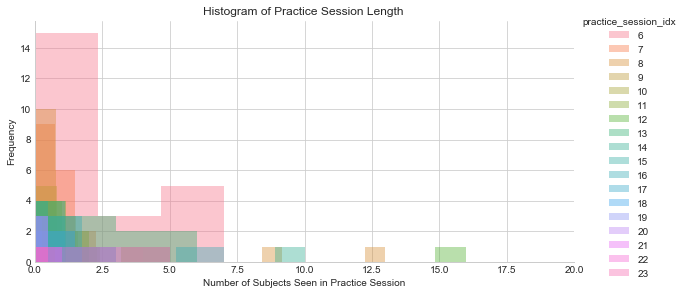

In [10]:
# Show the Length Plot for 
showLenPlot(practice_session_length[practice_session_length.practice_session_idx > 5], 20)
practice_trimmed = practice_session_length[practice_session_length.practice_session_idx > 1]

In [11]:
practice_trimmed.head()

,user_name,session,length,practice_session_idx
2,ElisabethB,e0ed9a0eee03b170d46dcda9a06004839e8488fc813f47...,1,2
3,ElisabethB,99d5b27b72aaf3f8fdd34e735a6580aceea041515343d0...,0,3
4,ElisabethB,5d48f733a6ed159a8e71ef38e37da83602efd6e9daee5a...,5,4
76,marisa_gomez,829b2c2e8df21c9e8c3c03c905441a5ac5323fcc6d23e1...,6,2
193,Vidar87,8f7cf6e891230c5db6e1a8f440d8c49a5470e93a5e6e0c...,0,2


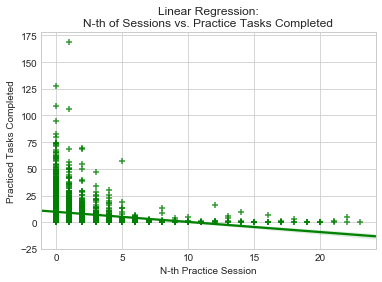

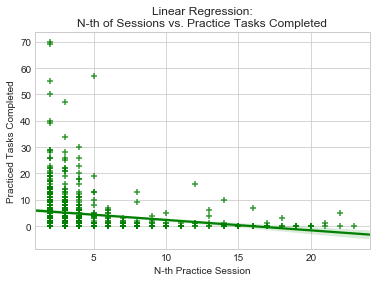

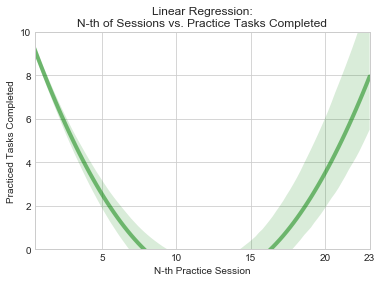

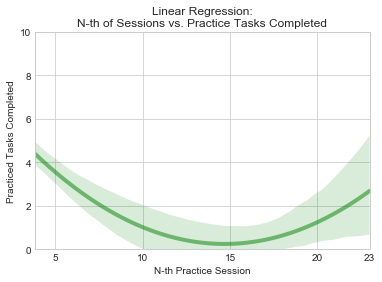

In [12]:
# - - Length Plot for All Users - - 
def showLenPlotReg(x, y):
    # Add styling
    sns.set_style("whitegrid")

    # create the base plot
    g = sns.regplot(x=x, y=y, color="g", marker="+")

    # specify axis limits / ticks
    #g.set(ylim=(0,12), xticks=[5,10,15,20,25])

    # add axis + title information
    plt.title("Linear Regression:\nN-th of Sessions vs. Practice Tasks Completed")
    plt.ylabel("Practiced Tasks Completed") 
    plt.xlabel("N-th Practice Session")

    # render the plot
    plt.show(g)
    
# Plot: All Practice Sessions
showLenPlotReg(practice_session_length.practice_session_idx, practice_session_length.length)

# Plot: 5th or More Practice Sessions
showLenPlotReg(practice_trimmed.practice_session_idx, practice_trimmed.length)


def showLenPlotReg2(x, y):
    # Add styling
    sns.set_style("whitegrid")

    color =  ["#91FF61"]*25 + ["#BA61FF"]*25 + ["#91FF61"]*25 + ["#BA61FF"]*25
    
    # create the base plot
    g = sns.regplot(x=x, y=y, scatter=False, scatter_kws={"color":"darkred","alpha":0.3,"s":90},
    line_kws={"color":"g","alpha":0.5,"lw":4},marker="x", order=2, ci=95, truncate=True)

    # specify axis limits / ticks
    g.set(ylim=(0,10), xticks=[5,10,15,20,23])

    # add axis + title information
    plt.title("Linear Regression:\nN-th of Sessions vs. Practice Tasks Completed")
    plt.ylabel("Practiced Tasks Completed") 
    plt.xlabel("N-th Practice Session")

    # render the plot
    plt.show(g)
    
# Plot: All Practice Sessions
showLenPlotReg2(practice_session_length.practice_session_idx, practice_session_length.length)

showLenPlotReg2(practice_trimmed.practice_session_idx, practice_trimmed.length)

The plot shows a trend that suggests **users are practicing less as they return to the practice workflow**. 

#### Now let's take a look at how frequent users practiced.

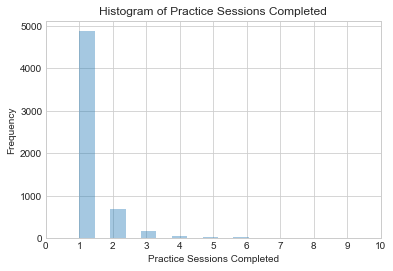


- - - - - - - - - - - - - - -
Session Information
- - - - - - - - - - - - - - -
Completed Sess.	| Num. Users
- - - - - - - - - - - - - - -
1		| 4878
2		| 684
3		| 179
4		| 64
5		| 40
6		| 21
7		| 5
8		| 2
9		| 7
10		| 2


In [13]:
# - - Frequency Plot - - 
def showFreqPlot(x):
    sns.set_style("whitegrid")

    # create the base plot
    g = sns.distplot(x, kde=False)

    # specify axis limits / ticks
    g.set(xlim=(0,10), xticks=[0,1,2,3,4,5,6,7,8,9, 10])

    # add axis + title information
    plt.title("Histogram of Practice Sessions Completed")
    plt.ylabel("Frequency") 
    plt.xlabel("Practice Sessions Completed")

    # render the plot
    plt.show(g)
    
# Show the Frequency Plot for All Users
showFreqPlot(practice_session_frequency['sessions'])

# Print Some Numbers
print('\n- - - - - - - - - - - - - - -')
print('Session Information')
print('- - - - - - - - - - - - - - -')
print("Completed Sess.\t| Num. Users")
print('- - - - - - - - - - - - - - -')
print('1\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 1].shape[0]))
print('2\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 2].shape[0]))
print('3\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 3].shape[0]))
print('4\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 4].shape[0]))
print('5\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 5].shape[0]))
print('6\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 6].shape[0]))
print('7\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 7].shape[0]))
print('8\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 8].shape[0]))
print('9\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 9].shape[0]))
print('10\t\t| '+str(practice_session_frequency[practice_session_frequency.sessions == 10].shape[0]))

# Print the Total Number of Users who 
print("\n\nTotal Number of Repeat-Practice Users: "+str(practice_session_frequency[practice_session_frequency.sessions > 1].shape[0]))

#### Before moving on, let's build a ZIP model to explore the possible trend we saw in the length plot.

In [14]:
%reload_ext rpy2.ipython


In [15]:
%%R -i practice_session_length
# Here, we use some R magic command to import the practice_session_length data frame.
# The data's distribution is zero-inflated and numeric, so we'll use a zero-inflated poisson regression model.
# NOTE: When asked about compilation, reply with "n".

# install the packages
install.packages(c("ggplot2", "rJava", "glmulti", "pscl", "lmtest"), repos='http://cran.us.r-project.org', quiet=TRUE)

# import packages
library(rJava)
library(pscl)
library(lmtest)
library(ggplot2)

# Build the Model.
m <- zeroinfl(length~ 1 +practice_session_idx, dist="poisson",link="logit", data = practice_session_length)

summary(m)

/Users/alex/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Do you want to install from sources the package which needs compilation?

  warnings.warn(x, RRuntimeWarning)


y/n: n


/Users/alex/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis

  warnings.warn(x, RRuntimeWarning)
/Users/alex/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: zoo

  warnings.warn(x, RRuntimeWarning)
/Users/alex/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attaching package: ‘zoo’


  warnings.warn(x, RRuntimeWarning)
/Users/alex/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


  warnings.warn(x, RRuntimeWarning)



  There is a binary version available but the source version is later:
       binary source needs_compilation
lmtest 0.9-35 0.9-36              TRUE


Call:
zeroinfl(formula = length ~ 1 + practice_session_idx, data = practice_session_length, 
    dist = "poisson", link = "logit")

Pearson residuals:
    Min      1Q  Median      3Q     Max 
-1.9193 -1.5373 -0.6737  1.3276 35.0952 

Count model coefficients (poisson with log link):
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           2.466133   0.003969   621.3   <2e-16 ***
practice_session_idx -0.173258   0.005330   -32.5   <2e-16 ***

Zero-inflation model coefficients (binomial with logit link):
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.76053    0.03382  -52.06   <2e-16 ***
practice_session_idx  0.20332    0.01990   10.22   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Number of iterations in BFGS optimization: 8 
Log-likelih

### A Significant Result!

**Significance!**: The model suggests that a statistically significant relationship exists between the number of practice sessions completed by a user and the number of subjects that they're completing in a given session.

### RQ1.e: Are there predictors (e.g. a challenging task) that indicate an individual may transition to practice?

A main focus of the practice workflow is understand what events might trigger individuals to navigate into the practice workflow. For this analysis, we will focus on two implicit signals from the subjects individuals see:
1. Subjects in which individuals demonstrate ample disagreement.
2. Subjects with a large number of countable objects.


## RQ2: What is the relationship between practicing and user performance? 
    - **RQ2.a**: Does practicing improve individuals' accuracy?
    - **RQ2.b**: Do individuals complete tasks faster when practicing?
    - **RQ2.c**: Are individuals more careless when practicing?
    - **RQ3.a**: Are individuals more consistent in their performance when practicing?

### Data Prep: Calculate Performance (Precision / Recall / F1)

In [54]:
# Calculate total objects
gt_df['total'] = gt_df['bubble'] + gt_df['bowshock'] + gt_df['bowshockdriving'] + gt_df['yellowball'] + gt_df['other']
df['total'] = df['bubble'] + df['bowshock'] + df['bowshockdriving'] + df['yellowball'] + df['other']


gt_df[gt_df.total > 0.0].shape[0]

683

### RQ2.a: Does practicing improve individuals' accuracy?

In order to analyze performance / accuracy, we'll need to calculate precision, recall, and F1-score for every user's response that has ground-truth available.

In [332]:
# Get a list of subjects with ground truth and at least one object.
#gt_df.reset_index(level=0, inplace=True)
gt_df.columns = ['subject_ids', 'gt_practice', 'gt_bubble', 'gt_bowshock', 'gt_bowshockdriving', 'gt_yellowball', 'gt_other', 'gt_total']
subjects_with_gt = gt_df[(gt_df.gt_total > 0.0)]['subject_ids']

# Get a subset of the DF with subjects with available ground truth.
df_accuracy = df[(df['subject_ids'].isin(subjects_with_gt)) & (df.is_expert == 0)]

# Add the GT data to each row in the df_accuracy dataframes's subject_ids column
df_accuracy = pandas.merge(df_accuracy, gt_df, on='subject_ids', how='outer')

# Define a function for calculate accuracy for each row.
def calculatePrecision(count, total, gt_count, gt_total):
    ''' Calculates precision.'''
    tp = 0
    fp = 0
    if count == gt_count: # Complete correctness
        tp = count
        fp = 0
    elif count < gt_count: # Under-counting 
        tp = count
        fp = 0
    elif count > gt_count: # Over-counting
        tp = gt_count
        fp = count - gt_count
        
    if (tp) != 0:
        return tp / (tp+fp)
    return np.NaN 

def calculateRecall(count, total, gt_count, gt_total):
    ''' Calculates recall.'''
    tp = 0
    fn = 0
    if count == gt_count: # Complete correctness
        tp = count
        fn = 0
    elif count < gt_count: # Under-counting
        tp = gt_count - count
        fn = gt_count - count
    elif count > gt_count: # Over-counting
        tp = gt_count
        fn = 0
        
    if (tp) != 0:
        return tp / (tp+fn)
    return np.NaN 

def calculateF1(precision, recall):
    ''' Calculates precision.'''
    if (precision+recall) != 0:
        return 2.0 * ((precision*recall) / (precision+recall))
    return np.NaN 

# Calculate P/R/F1 for Bubble
df_accuracy['p_bubble'] = df_accuracy.apply(lambda x: calculatePrecision(x['bubble'], x['total'], x['gt_bubble'], x['gt_total']), axis=1)
df_accuracy['r_bubble'] = df_accuracy.apply(lambda x: calculateRecall(x['bubble'], x['total'], x['gt_bubble'], x['gt_total']), axis=1)
df_accuracy['f1_bubble'] = df_accuracy.apply(lambda x: calculateF1(x['p_bubble'], x['r_bubble']), axis=1)

# Calculate P/R/F1 for Bowshock
df_accuracy['p_bowshock'] = df_accuracy.apply(lambda x: calculatePrecision(x['bowshock'], x['total'], x['gt_bowshock'], x['gt_total']), axis=1)
df_accuracy['r_bowshock'] = df_accuracy.apply(lambda x: calculateRecall(x['bowshock'], x['total'], x['gt_bowshock'], x['gt_total']), axis=1)
df_accuracy['f1_bowshock'] = df_accuracy.apply(lambda x: calculateF1(x['p_bowshock'], x['r_bowshock']), axis=1)

# Calculate P/R/F1 for BowshockDriving
df_accuracy['p_bowshockdriving'] = df_accuracy.apply(lambda x: calculatePrecision(x['bowshockdriving'], x['total'], x['gt_bowshockdriving'], x['gt_total']), axis=1)
df_accuracy['r_bowshockdriving'] = df_accuracy.apply(lambda x: calculateRecall(x['bowshockdriving'], x['total'], x['gt_bowshockdriving'], x['gt_total']), axis=1)
df_accuracy['f1_bowshockdriving'] = df_accuracy.apply(lambda x: calculateF1(x['p_bowshockdriving'], x['r_bowshockdriving']), axis=1)

# Calculate P/R/F1 for Yellowball
df_accuracy['p_yellowball'] = df_accuracy.apply(lambda x: calculatePrecision(x['yellowball'], x['total'], x['gt_yellowball'], x['gt_total']), axis=1)
df_accuracy['r_yellowball'] = df_accuracy.apply(lambda x: calculateRecall(x['yellowball'], x['total'], x['gt_yellowball'], x['gt_total']), axis=1)
df_accuracy['f1_yellowball'] = df_accuracy.apply(lambda x: calculateF1(x['p_yellowball'], x['r_yellowball']), axis=1)

# Calculate P/R/F1 for Other
df_accuracy['p_other'] = df_accuracy.apply(lambda x: calculatePrecision(x['other'], x['total'], x['gt_other'], x['gt_total']), axis=1)
df_accuracy['r_other'] = df_accuracy.apply(lambda x: calculateRecall(x['other'], x['total'], x['gt_other'], x['gt_total']), axis=1)
df_accuracy['f1_other'] = df_accuracy.apply(lambda x: calculateF1(x['p_other'], x['r_other']), axis=1)

In [333]:
df_accuracy[0:300]

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,...,f1_bowshock,p_bowshockdriving,r_bowshockdriving,f1_bowshockdriving,p_yellowball,r_yellowball,f1_yellowball,p_other,r_other,f1_other
0,14024662,ElisabethB,123,661517f90696db2df53e,2250,Learning the Ropes,29.34,2016-07-14 07:25:05 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,1.0,1.000000,NaN,NaN,NaN
1,14024686,ElisabethB,123,1ebb887c786186a2f903,2245,Map the Milky Way,41.105,2016-07-14 07:27:36 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15394512,L82,3483,c3fce65f7d69a3579160,2245,Map the Milky Way,42.111,2016-08-13 09:26:23 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17297886,keeps2013,404108,4e104be354f56423713d,2245,Map the Milky Way,42.125,2016-09-16 00:39:04 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17305138,rm3082,2148,da1e9ff35218dfc0d406,2245,Map the Milky Way,42.125,2016-09-16 03:32:17 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,17313974,avastro,42595,0380bb1c87dade89352f,2245,Map the Milky Way,42.125,2016-09-16 07:56:28 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,17317803,not-logged-in-93148278f618be6488c4,NaN,93148278f618be6488c4,2245,Map the Milky Way,42.125,2016-09-16 09:13:55 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,17324750,not-logged-in-c13799496d4765a6ae65,NaN,c13799496d4765a6ae65,2245,Map the Milky Way,42.125,2016-09-16 11:10:28 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,17337114,acy0002,1.48503e+06,bdbe5314af5658fe9cab,2245,Map the Milky Way,42.125,2016-09-16 13:41:16 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,17337165,acy0002,1.48503e+06,bdbe5314af5658fe9cab,2245,Map the Milky Way,42.125,2016-09-16 13:41:46 UTC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


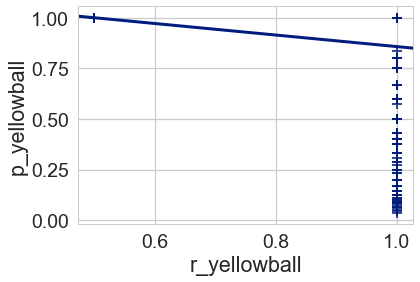

In [349]:
# Add styling
sns.set_style("whitegrid")

#g = sns.FacetGrid(df_accuracy, hue="did_practice", aspect=2, size=4)
#g = g.map(sns.distplot, "f1_other")
#g.add_legend()
sns.regplot(x=df_accuracy['r_yellowball'], y=df_accuracy['p_yellowball'], marker="+")

**Note to Future-Self: You calculated Precision and Recall incorrectly. NICE ONE.**

## RQ3: What is the relationship between practicing and user engagement?

The simplest analysis to conduct is to quickly look at how many tasks people completed and whether or not they practice.

In [366]:
df_engagement = df[(df.is_expert == 0) & ~(df.user_name.str.contains('not-logged-in', na=False)) & (df.practice == 0)]
df_engagement_amt = df_engagement.user_name.value_counts()
df_engagement_amt = pandas.DataFrame({'user_name':df_engagement_amt.index, 'amt':df_engagement_amt.values})

df_engagement_amt['did_practice'] = df_engagement_amt['user_name'].apply(lambda x: didPractice(x)) 

In [368]:
df_engagement_amt[df_engagement_amt.did_practice == 0].head()

,amt,user_name,did_practice
5,35162,Prothon,0
6,34309,totallunar,0
7,19196,c_cld,0
11,11926,lamperti,0
20,6900,carddealer,0


Text(0.5,27,'Number of Completed Tasks')

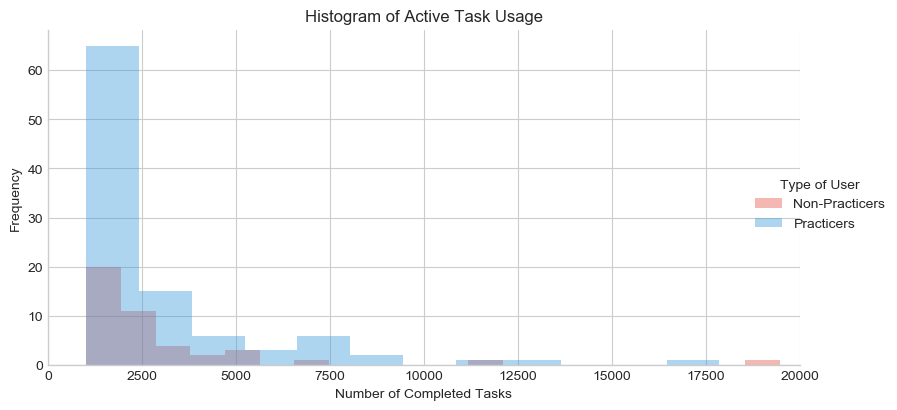

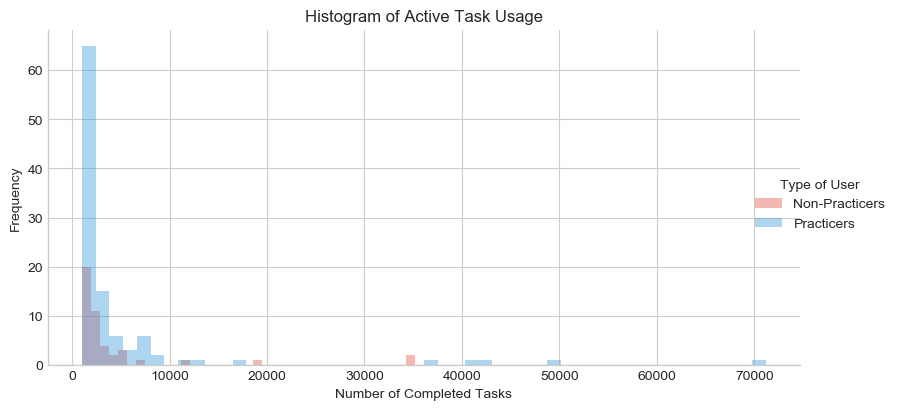

In [394]:
sns.reset_orig()
sns.set_style("whitegrid")
df_engagement_amt_trimmed = df_engagement_amt[df_engagement_amt.amt > 1000]

# # # Plot 1: X-axis 0 to 20000
g = sns.FacetGrid(df_engagement_amt_trimmed, hue="did_practice", size=4, aspect=2, palette=[ "#e74c3c", "#3498db", "#34495e", "#2ecc71"])
g = g.map(sns.distplot, "amt", kde=False)

g.add_legend()
g._legend.set_title("Type of User")
new_labels = ['Non-Practicers', 'Practicers']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# specify axis limits / ticks
g.set(xlim=(0,20000))

# add axis + title information
plt.title("Histogram of Active Task Usage")
plt.ylabel("Frequency") 
plt.xlabel("Number of Completed Tasks")


# # # Plot 2: X-axis 0 to max
g = sns.FacetGrid(df_engagement_amt_trimmed, hue="did_practice", size=4, aspect=2, palette=[ "#e74c3c", "#3498db", "#34495e", "#2ecc71"])
g = g.map(sns.distplot, "amt", kde=False)

g.add_legend()
g._legend.set_title("Type of User")
new_labels = ['Non-Practicers', 'Practicers']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# specify axis limits / ticks
#g.set(xlim=(0,20000))

# add axis + title information
plt.title("Histogram of Active Task Usage")
plt.ylabel("Frequency") 
plt.xlabel("Number of Completed Tasks")

In [395]:
df[(df.is_expert == 0) & (df.practice == 0)].groupby(['subject_ids']).mean().round().shape[0]

97180